&nbsp;
# Plan Streamlit Dashboard
The dashboard will display a small mount of information

In [86]:
my_top50_artist_country = pd.read_json('../data/mytop50_artists.json')
my_top50_artist_country.head(5)

,artist,gender,age,type,country,city_1,district_1,city_2,district_2,city_3,district_3
0,Drake,male,33,person,CA,n/a,n/a,Toronto,n/a,n/a,n/a
1,Travis Scott,male,28,person,US,n/a,n/a,Houston,n/a,n/a,n/a
2,Juice WRLD,male,21,person,US,n/a,n/a,Chicago,n/a,Oak Lawn,n/a
3,The Weeknd,male,30,person,CA,n/a,n/a,Scarborough,n/a,n/a,n/a
4,Billie Eilish,female,18,person,US,n/a,n/a,Los Angeles,n/a,n/a,n/a


### Top 5
Bubble chart

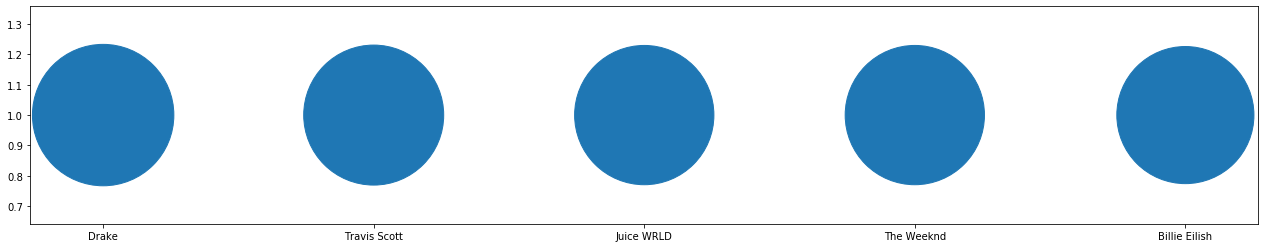

In [66]:
import matplotlib.pyplot as plt

top5 = artists.head()
x=top5.name
y=[1,1,1,1,1]

fig, ax = plt.subplots(figsize=(22,4))
ax.scatter(x, y, s=top5.popularity*200)

### Where They're From?
Group countries into bar chart

<BarContainer object of 8 artists>

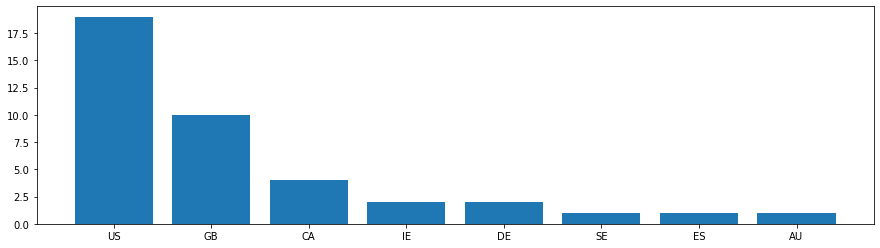

In [94]:
def get_country_groups(top50_df):
    """Pass Top 50 artists and returns country group of those artists"""
    # Remove 'n/a'
    remove_nas = top50_df.loc[top50_df.country != 'n/a']
    # Group artists into countries and sort
    return remove_nas.groupby('country').artist.count().sort_values(ascending=False)

countries_group = get_country_groups(my_top50_artist_country)

fig, ax = plt.subplots(figsize=(15,4))
ax.bar(countries_group.index, countries_group)

### Age?
Group artist's age into age groups

<ipython-input-90-706bc4d0d5c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['AgeGroup'] = pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=False)


<BarContainer object of 40 artists>

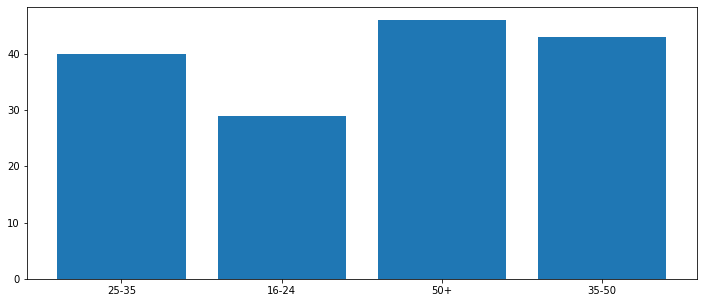

In [90]:
def get_age_groups(top50_df):
    """Pass Top 50 artists and returns age group of those artists"""
    # Remove 'n/a'
    cleaned_df = top50_df.loc[top50_df.age != 'n/a']

    # Define age groups
    bins= [0,15,24,35,50,110]
    labels = ['0-15', '16-24', '25-35', '35-50', '50+']
    return pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=False)

age_groups = get_age_groups(my_top50_artist_country)

# Plot
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(age_groups, age_groups.index)

### Genres
Get favourite genre. Find some way of grouping the genres.

In [76]:
top5 = artists.head(10)
top5.head()

,followers,genres,name,popularity,type
3,10884208,"[chicago rap, melodic rap]",Juice WRLD,100,artist
6,48145787,"[canadian hip hop, canadian pop, hip hop, pop ...",Drake,98,artist
37,11201910,[rap],Travis Scott,96,artist
1,22443749,"[canadian contemporary r&b, canadian pop, pop]",The Weeknd,95,artist
15,29948767,"[electropop, pop]",Billie Eilish,92,artist


In [77]:
top5.genres[1]

['canadian contemporary r&b', 'canadian pop', 'pop']

Approach:
- Loop through DataFrame and search genres list
- Generalise genre into Rock, Rap, Pop, House, and Funk
- Add new column to DF

<BarContainer object of 10 artists>

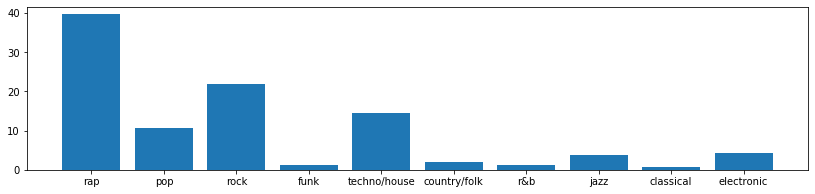

In [105]:
def get_genres(df):
    """Pass artists df and returns graded genre dict"""
    # Init genre values
    rock=rap=pop=house=funk=folk=RandB=jazz=classical=electronic=0
    # Loop over each artist
    for genres in df.genres:
        # Loop through artist's list of genres
        for genre in genres:
            if 'rap' in genre or 'hip hop' in genre:
                rap+=1
            elif 'pop' in genre:
                pop+=1
            elif 'rock' in genre:
                rock+=1
            elif 'funk' in genre:
                funk+=1
            elif 'house' in genre or 'techno' in genre:
                house+=1
            elif 'folk' in genre or 'country' in genre:
                folk+=1
            elif 'r&b' in genre or 'rhythm' in genre:
                RandB+=1
            elif 'jazz' in genre:
                jazz+=1
            elif 'classical' in genre:
                classical+=1
            elif 'electronic' in genre:
                electronic+=1 
    
    # Find sum of all genres
    total = rock+rap+pop+house+funk+folk+RandB+jazz+classical+electronic
    
    # Pass genre and total to percent grade
    return {
        'rap': grade_genre(rap, total),
        'pop': grade_genre(pop, total),
        'rock': grade_genre(rock, total),
        'funk': grade_genre(funk, total),
        'techno/house': grade_genre(house, total),
        'country/folk':grade_genre(folk, total),
        'r&b': grade_genre(RandB, total),
        'jazz': grade_genre(jazz, total),
        'classical': grade_genre(classical, total),
        'electronic': grade_genre(electronic, total)
    }

def grade_genre(genre, total):
    """Pass genre and total of genres, returns percent graded genre"""
    return (genre/total) * 100
    
genres = get_genres(artists)

fig, ax = plt.subplots(figsize=(14,3))
ax.bar(genres.keys(), genres.values())

### Weighted Genres
This only gives the total number of instances of a word and doesn't take the artist popularity of the artist into account. A weighting system that accounts for the artist's rank would be more accurate. The popularity column could be used to give a better picture.

In [80]:
def get_genres(df):
    # Init genres
    rock=rap=pop=house=funk=folk=1
    # Loop over each artist
    for (genres,pops) in zip(df.genres, df.popularity):
        # Loop through artist's list of genres
        for genre in genres:
            if 'rap' in genre or 'hip hop' in genre:
                rap*=pops
            elif 'pop' in genre:
                pop*=pops
            elif 'rock' in genre:
                rock*=pops
            elif 'funk' in genre:
                funk*=pops
            elif 'house' in genre:
                house*=pops
            elif 'folk' in genre:
                folk*=pops
                
    total = rock+rap+pop+house+funk+folk
                
    return {
        'rap': grade_genre(rap, total),
        'pop': grade_genre(pop, total),
        'rock': grade_genre(rock, total),
        'funk': grade_genre(funk, total),
        'house': grade_genre(house, total),
        'folk':grade_genre(folk, total),
    }

def grade_genre(genre, total):
    return (genre/total) * 100
    
genres = get_genres(artists)
genres

# Plot
# fig, ax = plt.subplots(figsize=(12,3))
# ax.bar(genres.keys(), genres.values())

# artists.head(20)

{'rap': 100.0,
 'pop': 4.696804625230636e-86,
 'rock': 1.6132278864553687e-51,
 'funk': 1.080242615791803e-114,
 'house': 1.0776211717638458e-83,
 'folk': 5.309141767402077e-115}